Load in the handwritten digits dataset using load_digits. This is the dataset we will be working with today. Use matplotlib's imshow to take a look at the first 10 elements of this dataset to see what we are dealing with (reshape them back into images).

shape of X:  (1797, 8, 8)
shape of y:  (1797,)


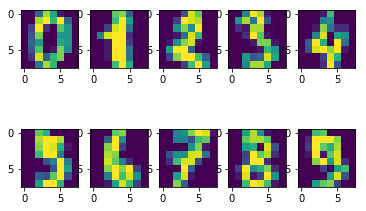

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
#from sklearn import svm, metrics
digits = datasets.load_digits()
X = digits.images
y = digits.target
print("shape of X: ", X.shape)
print("shape of y: ", y.shape)
for i in np.arange(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i])
  #  plt.show()
#print(X[:5])

First experiment with the dataset as an unsupervised learning problem---that is ignoring the class labels that we were provided. In particular, we will investigate attempting to cluster these digits using K-means. We know that there are 10 classes to work with, so we will start with K=10.

X_.shape=  (1797, 64)
kmeans.cluster_centers_.shape=  (10, 64)


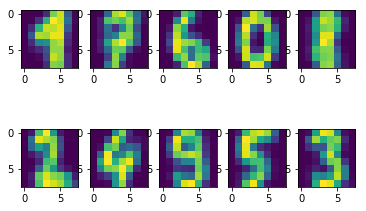

In [2]:
# UNsupervised Testing using k-means
# (my first unsupervised try)
from sklearn.cluster import KMeans

X_ = X.reshape(-1, 64)
kmeans = KMeans(n_clusters=10, random_state=821150).fit(X_)

print("X_.shape= ", X_.shape)
print("kmeans.cluster_centers_.shape= ", kmeans.cluster_centers_.shape)

for cluster_index in np.arange(10):
    plt.subplot(2, 5, cluster_index +1)
    plt.imshow(kmeans.cluster_centers_[cluster_index].reshape(8,8))
    #plt.show()

Comments:

Are there cluster centers clearly for all 10 digit classes?

No; digit 1, 7, 9 seem to have duplicates (or missing) when k =10

How about what happens if you have the number of cluster centers wrong: say 4 or 12?

When K = 12, all 0-9 digits are identifiable, but with duplicates of 1s, and 7s
When K = 4, there will be only 4 digits, and they are distinct from each other.

In [3]:
#y_kmeans_X = kmeans.predict(X_) # == kmeans.labels_
y_kmeans_clusters = kmeans.predict(kmeans.cluster_centers_)

#print("k_means.labels.shape= ",kmeans.labels_.shape)
#print("y_kmeans_X.shape= ", y_kmeans_X.shape)
print("y_kmeans_clusters.shape= ", y_kmeans_clusters.shape)

print("cluster_centers:", y_kmeans_clusters)



y_kmeans_clusters.shape=  (10,)
cluster_centers: [0 1 2 3 4 5 6 7 8 9]


Implement logistic regression to try to predict digit labels. Much like the cluster centers from before, each class has an associated weight vector what is used specify the class, so please plot those to see how the class decision is being made. Can you identify the digit classes now from the weights?

C:\Users\joshuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


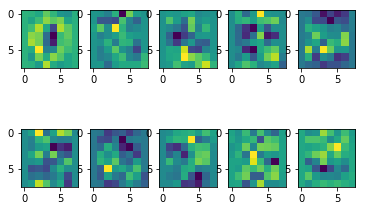

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 821150, multi_class = "multinomial", solver = "lbfgs").fit(X.reshape(-1, 64), y)
clf.classes_
clf.coef_.shape

for clf_cluster_index in np.arange(10):
    plt.subplot(2, 5, clf_cluster_index +1)
    plt.imshow(clf.coef_[clf_cluster_index].reshape(8,8))
    #plt.show()

In [5]:
clf.predict(clf.coef_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])